# 프로젝트 체크리스트 (2024-02-02 기초통계)


### 기술통계 및 추정 (7)

  - [] 데이터셋의 전체 구조 파악 (변수의 종류, 데이터의 크기 등)
  - [] 기술통계량 계산 (평균, 중앙값, 분산, 표준편차 등)
  - [] 데이터 분포 탐색 (정규성 검정, 왜도 및 첨도 분석)
  - [] 이상치 탐색 및 처리
  - [] 결측치 탐색 및 처리
  - [] 상관관계 분석
  - [] 시각화를 통한 데이터 탐색 (히스토그램, 박스플롯, 산점도 등)



### 추정 (3)

  - [] 모집단의 특성 추정 (신뢰구간 계산)
  - [] 표본 크기 결정
  - [] 추정 오차 분석



### 검정 (5)

  - [] 가설 설정: 귀무가설과 대립가설
  - [] 적절한 검정 방법 선택: t-검정, 카이제곱 검정, ANOVA 등
  - [] 검정 수행 및 결과 해석
  - [] 검정의 유의성 평가: p-값, 신뢰구간
  - [] 검정 결과에 대한 해석 및 결론 도출



### 회귀 분석 (4)

  - [] 회귀 모델 선택: 선형 회귀, 다중 회귀, 로지스틱 회귀 등
  - [] 회귀 계수 해석: 각 독립 변수의 영향력 파악
  - [] 모델 적합도 검증: 결정 계수(R²), 잔차 분석 등
  - [] 다중공선성 진단: VIF 등을 통한 독립 변수 간 상호 의존성 검사

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns


transcript = pd.read_csv('/kaggle/input/starbucks-customer-data/transcript.csv')
customer = pd.read_csv('/kaggle/input/starbucks-customer-data/profile.csv')
pf = pd.read_csv('/kaggle/input/starbucks-customer-data/portfolio.csv')

## 기술통계 및 추정 (7)
	•	[v] 데이터셋의 전체 구조 파악 (변수의 종류, 데이터의 크기 등)
	•	[v] 기술통계량 계산 (평균, 중앙값, 분산, 표준편차 등)
	•	[v] 데이터 분포 탐색 (정규성 검정, 왜도 및 첨도 분석)
	•	[v] 이상치 탐색 및 처리
	•	[v] 결측치 탐색 및 처리
	•	[] 상관관계 분석
	•	[v] 시각화를 통한 데이터 탐색 (히스토그램, 박스플롯, 산점도 등)

In [2]:
transcript.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [8]:
transcript['event'].value_counts(1)

event
transaction        0.453304
offer received     0.248837
offer viewed       0.188315
offer completed    0.109544
Name: proportion, dtype: float64

In [15]:
transcript[transcript['event'] == 'transaction']

,Unnamed: 0,person,event,value,time
12654,12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0
12657,12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0
12659,12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0
12670,12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0
12671,12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0
...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


<Axes: >

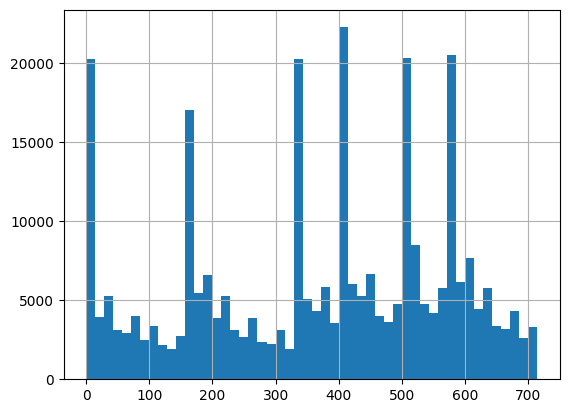

In [65]:
transcript['time'].hist(bins = 50)

# time 칼럼이 무엇인지 알 수 없음..

In [16]:
transcript[transcript['event'] == 'offer completed']

,Unnamed: 0,person,event,value,time
12658,12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0
12672,12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0
12679,12679,629fc02d56414d91bca360decdfa9288,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,0
12692,12692,676506bad68e4161b9bbaffeb039626b,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,0
12697,12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,0
...,...,...,...,...,...
306475,306475,0c027f5f34dd4b9eba0a25785c611273,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,714
306497,306497,a6f84f4e976f44508c358cc9aba6d2b3,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,714
306506,306506,b895c57e8cd047a8872ce02aa54759d6,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714
306509,306509,8431c16f8e1d440880db371a68f82dd0,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714


In [45]:
# transcript 의 경우, tx 인 경우와 offer 관련인 경우 두 개의 성격이 다르기 때문에 테이블을 분리합니다

tx = transcript[transcript['event'] == 'transaction']

In [48]:
pd.set_option('mode.chained_assignment', None)

tx['amount'] = tx['value'].str.extract(r"(\d+\.\d+)", expand=False).astype(float)
tx

,Unnamed: 0,person,event,value,time,amount
12654,12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0,0.83
12657,12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0,34.56
12659,12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0,13.23
12670,12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0,19.51
12671,12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0,18.97
...,...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,1.59
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,9.53
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,3.61
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,3.53


In [ ]:
tx.drop(['event', 'value', 'Unnamed: 0'], axis=1, inplace=True)

In [18]:
transcript = transcript[transcript['event'] != 'transaction']
transcript['event'].value_counts()

event
offer received     76277
offer viewed       57725
offer completed    33579
Name: count, dtype: int64

In [27]:
customer.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [4]:
pf.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [113]:
pf['offer_type'].value_counts(1)

offer_type
bogo             0.4
discount         0.4
informational    0.2
Name: proportion, dtype: float64

In [114]:
pf['channels'].value_counts(1)

channels
['web', 'email', 'mobile', 'social']    0.4
['web', 'email', 'mobile']              0.3
['email', 'mobile', 'social']           0.2
['web', 'email']                        0.1
Name: proportion, dtype: float64

In [20]:
pf.describe()

,Unnamed: 0,reward,difficulty,duration
count,10.00000,10.000000,10.000000,10.000000
mean,4.50000,4.200000,7.700000,6.500000
std,3.02765,3.583915,5.831905,2.321398
min,0.00000,0.000000,0.000000,3.000000
25%,2.25000,2.000000,5.000000,5.000000
50%,4.50000,4.000000,8.500000,7.000000
75%,6.75000,5.000000,10.000000,7.000000
max,9.00000,10.000000,20.000000,10.000000


In [28]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


In [35]:
customer.describe()

,Unnamed: 0,age,became_member_on,income
count,17000.000000,17000.000000,1.700000e+04,14825.000000
mean,8499.500000,62.531412,2.016703e+07,65404.991568
std,4907.621624,26.738580,1.167750e+04,21598.299410
min,0.000000,18.000000,2.013073e+07,30000.000000
25%,4249.750000,45.000000,2.016053e+07,49000.000000
50%,8499.500000,58.000000,2.017080e+07,64000.000000
75%,12749.250000,73.000000,2.017123e+07,80000.000000
max,16999.000000,118.000000,2.018073e+07,120000.000000


# 이상치

- age == 118 은 null 값인듯

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'became_member_on'}>,
        <Axes: title={'center': 'income'}>]], dtype=object)

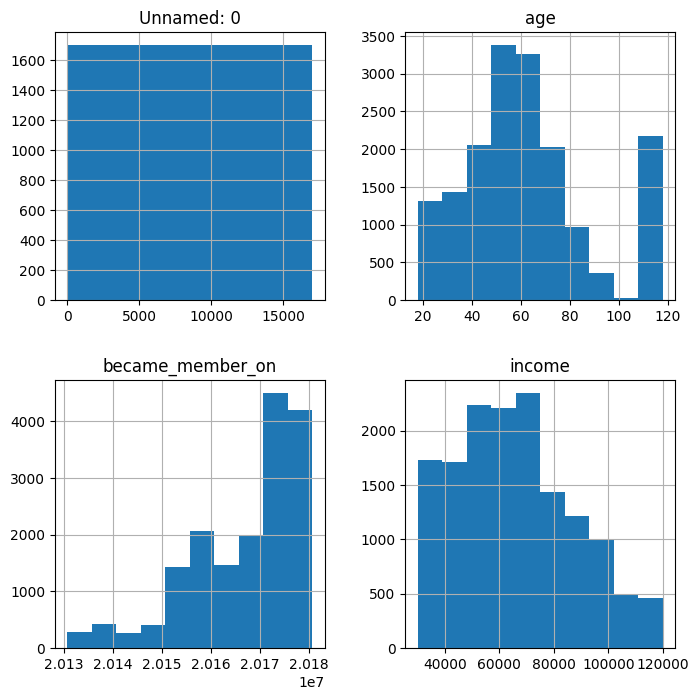

In [90]:
customer.hist(figsize=(8,8))

<Axes: ylabel='Frequency'>

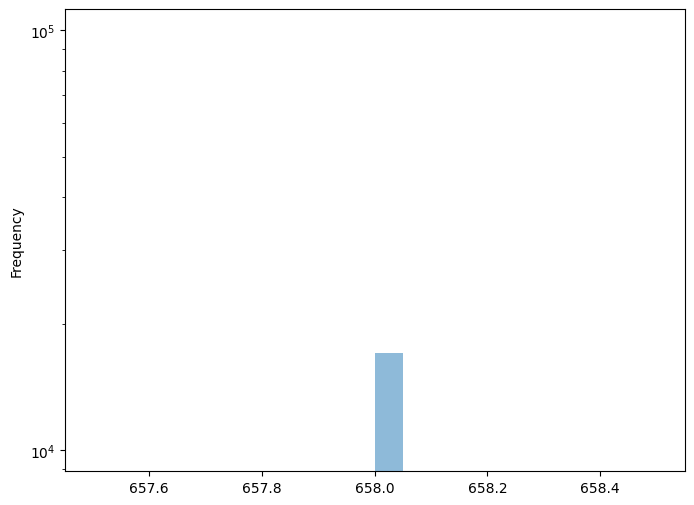

In [93]:
import matplotlib.pyplot as plt

profile['member_months'].plot(kind='hist', figsize=(8, 6), bins=20, alpha=0.5, logy=True)

count    17000.0
mean       658.0
std          0.0
min        658.0
25%        658.0
50%        658.0
75%        658.0
max        658.0
Name: member_months, dtype: float64

In [105]:
# 어딘가 꼬인듯하여.. 다시 데이터 받아온다

temp = pd.read_csv('/kaggle/input/starbucks-customer-data/profile.csv')
customer['became_member_on'] = temp['became_member_on']

In [106]:
customer['became_member_on']

0        20170212
1        20170715
2        20180712
3        20170509
4        20170804
           ...   
16995    20180604
16996    20180713
16997    20170126
16998    20160307
16999    20170722
Name: became_member_on, Length: 17000, dtype: int64

In [107]:
customer['became_member_on'] = pd.to_datetime(customer['became_member_on'], format='%Y%m%d')
customer['became_member_on']

0       2017-02-12
1       2017-07-15
2       2018-07-12
3       2017-05-09
4       2017-08-04
           ...    
16995   2018-06-04
16996   2018-07-13
16997   2017-01-26
16998   2016-03-07
16999   2017-07-22
Name: became_member_on, Length: 17000, dtype: datetime64[ns]

## NOTE
- 여기서 datetime 으로 바꿔주면 전부 1970-01-01 00:00:00.020170212 으로 통일되어버리는데.. 왜이런거지?
- format 을 %Y%m%d 로 지정해주니 다시 된다

In [108]:
customer['member_months'] = ((datetime.today() - customer['became_member_on'])/ pd.Timedelta(days=30)).astype(int)
customer['member_months']

0        84
1        79
2        67
3        82
4        79
         ..
16995    68
16996    67
16997    85
16998    96
16999    79
Name: member_months, Length: 17000, dtype: int64

<Axes: ylabel='Frequency'>

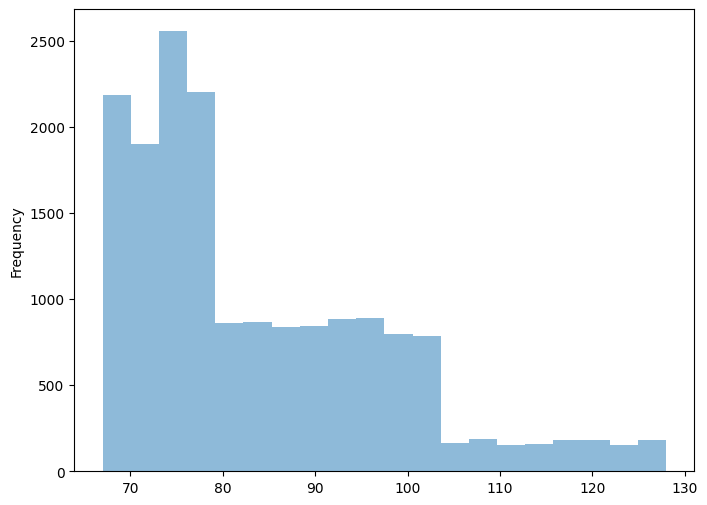

In [111]:
import matplotlib.pyplot as plt

customer['member_months'].plot(kind='hist', figsize=(8, 6), bins=20, alpha=0.5)

# 결측치

In [29]:
# 결측치는 customer 의 gender, income 에만 있음
# 두 칼럼은 세트로 missing. age 도 118 로 되어있는 것으로 보아 age 도 missing 일 것이다
# 전체의 12%가 없기때문에 추정해서 채워 넣지 않고 그냥 비워두기로
# 정확한 정보는 '멤버였던 기간' 정도
customer.isna().mean()

Unnamed: 0          0.000000
gender              0.127941
age                 0.000000
id                  0.000000
became_member_on    0.000000
income              0.127941
dtype: float64

In [95]:
customer[customer.isna().any(axis=1)]

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,7,NaN,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...,...
16980,16980,NaN,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,16982,NaN,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,16989,NaN,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,16991,NaN,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


In [23]:
pf.isna().mean()

Unnamed: 0    0.0
reward        0.0
channels      0.0
difficulty    0.0
duration      0.0
offer_type    0.0
id            0.0
dtype: float64

In [24]:
tx.isna().mean()

Unnamed: 0    0.0
person        0.0
event         0.0
value         0.0
time          0.0
dtype: float64

In [25]:
transcript.isna().mean()

Unnamed: 0    0.0
person        0.0
event         0.0
value         0.0
time          0.0
dtype: float64

# Feature Engineering

In [55]:
from datetime import datetime

In [99]:
customer['became_member_on'] = pd.to_datetime(customer['became_member_on'])
customer['became_member_on']

0       1970-01-01 00:00:00.020170212
1       1970-01-01 00:00:00.020170715
2       1970-01-01 00:00:00.020180712
3       1970-01-01 00:00:00.020170509
4       1970-01-01 00:00:00.020170804
                     ...             
16995   1970-01-01 00:00:00.020180604
16996   1970-01-01 00:00:00.020180713
16997   1970-01-01 00:00:00.020170126
16998   1970-01-01 00:00:00.020160307
16999   1970-01-01 00:00:00.020170722
Name: became_member_on, Length: 17000, dtype: datetime64[ns]

In [ ]:
customer['member_months'] = ((datetime.today() - customer['became_member_on'])/ pd.Timedelta(days=30)).astype(int)

customer

In [119]:
transcript = transcript[transcript['event'] != 'transaction']
transcript['event'].value_counts(1)

event
offer received     0.455165
offer viewed       0.344460
offer completed    0.200375
Name: proportion, dtype: float64

In [127]:
pf.rename({'customer_id':'offer_id'}, axis=1, inplace=True)
pf

,reward,channels,difficulty,duration,offer_type,offer_id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [134]:
# customer.rename({'id':'customer_id'}, axis=1, inplace=True)
# customer.drop('Unnamed: 0', axis=1, inplace=True)

In [140]:
# transcript.drop('Unnamed: 0', axis=1, inplace=True)
transcript.rename({'person':'customer_id'}, axis=1, inplace=True)
transcript

,customer_id,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306497,a6f84f4e976f44508c358cc9aba6d2b3,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,714
306506,b895c57e8cd047a8872ce02aa54759d6,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714
306507,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},714
306509,8431c16f8e1d440880db371a68f82dd0,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714


In [147]:
transcript['value'].info()

<class 'pandas.core.series.Series'>
Index: 167581 entries, 0 to 306527
Series name: value
Non-Null Count   Dtype 
--------------   ----- 
167581 non-null  object
dtypes: object(1)
memory usage: 2.6+ MB


In [143]:
import ast

transcript['value'].apply(lambda x: ast.literal_eval(x).get('offer id', None))

0         9b98b8c7a33c4b65b9aebfe6a799e6d9
1         0b1e1539f2cc45b7b9fa7c272da2e1d7
2         2906b810c7d4411798c6938adc9daaa5
3         fafdcd668e3743c1bb461111dcafc2a4
4         4d5c57ea9a6940dd891ad53e9dbe8da0
                        ...               
306497                                None
306506                                None
306507    0b1e1539f2cc45b7b9fa7c272da2e1d7
306509                                None
306527                                None
Name: value, Length: 167581, dtype: object

In [149]:
def extract_offer_id(entry):
    try:
        # Convert the string to a dictionary
        entry_dict = ast.literal_eval(entry)
        # Try to get 'offer id' first, then 'offer_id' if the former doesn't exist
        return entry_dict.get('offer id') or entry_dict.get('offer_id')
    except ValueError as e:
        # Handle the case where the string cannot be converted to a dictionary
        print(f"Error converting entry to dictionary: {e}")
        return None

# Apply the function to extract the 'offer id'
transcript['offer_id'] = transcript['value'].apply(lambda x: extract_offer_id(x))

In [152]:
transcript['offer_id'].isna().any()

False

In [155]:
transcript.drop('value', axis=1, inplace=True)

In [156]:
pf.head()

,reward,channels,difficulty,duration,offer_type,offer_id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


# 추정 (3)
* [] 모집단의 특성 추정 (신뢰구간 계산)
* [] 표본 크기 결정
* [] 추정 오차 분석

In [161]:
tx.rename({'person':'customer_id'}, axis=1, inplace=True)

In [166]:
customer_amt = tx.groupby('customer_id')['amount'].sum()

customer = customer.merge(customer_amt, how='left', on='customer_id')
customer

,gender,age,customer_id,became_member_on,income,member_months,amount
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,84,20.40
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,79,77.01
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,67,14.30
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,82,159.27
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,79,4.65
...,...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,68,20.03
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,67,25.97
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,85,39.74
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,96,189.67


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='income', ylabel='amount'>

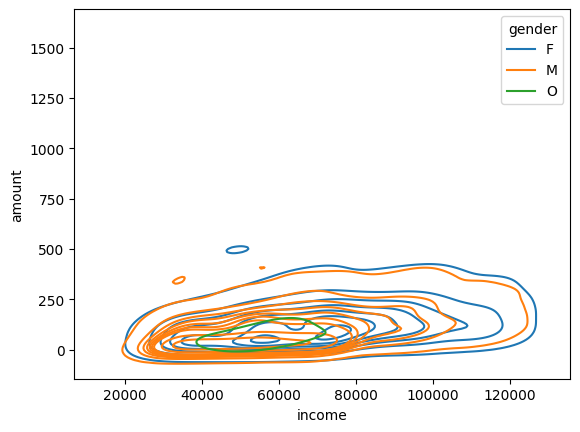

In [168]:
sns.kdeplot(data=customer, x='income', y='amount', hue='gender')

# 중간 점검
- 결측치가 age, sex, income 없는 고객이 전체의 12%였기 때문에, 이보다는 결측치가 없는 '얼마나 오래동안 스벅 고객이었는가' 를 기준으로 하려고 함
- customer.member_month 칼럼으로 멤버 기간
- tx.amount 로 멤버 id 별 이용 금액

# 회고
- 